In [1]:
import os
from pathlib import Path
import numpy as np
import torch
import matplotlib.pyplot as plt
from monai.transforms import Affine, Rand2DElastic
from monai.config import print_config
from monai.apps import download_and_extract
from PIL import Image

In [14]:
source = Path(r"D:\Kodingan\Kodingan TA\database\\training")
dirs = os.listdir(str(source))
device = "cpu" if not torch.cuda.is_available() else "cuda:0"

In [9]:
print(dirs)

['patient001', 'patient002', 'patient003', 'patient004', 'patient005', 'patient006', 'patient007', 'patient008', 'patient009', 'patient010', 'patient011', 'patient012', 'patient013', 'patient014', 'patient015', 'patient016', 'patient017', 'patient018', 'patient019', 'patient020', 'patient021', 'patient022', 'patient023', 'patient024', 'patient025', 'patient026', 'patient027', 'patient028', 'patient029', 'patient030', 'patient031', 'patient032', 'patient033', 'patient034', 'patient035', 'patient036', 'patient037', 'patient038', 'patient039', 'patient040', 'patient041', 'patient042', 'patient043', 'patient044', 'patient045', 'patient046', 'patient047', 'patient048', 'patient049', 'patient050', 'patient051', 'patient052', 'patient053', 'patient054', 'patient055', 'patient056', 'patient057', 'patient058', 'patient059', 'patient060', 'patient061', 'patient062', 'patient063', 'patient064', 'patient065', 'patient066', 'patient067', 'patient068', 'patient069', 'patient070', 'patient071', 'pati

In [ ]:
from torchmetrics import IoU

In [8]:
image = np.load("D:\Kodingan\Kodingan TA\database\dataclean\patient1\image\patient001_frame01_slice1.npy")
seg= np.load("D:\Kodingan\Kodingan TA\database\dataclean\patient1\mask\patient001_frame01_gt_slice1.npy")
print(image.shape)

(216, 256)


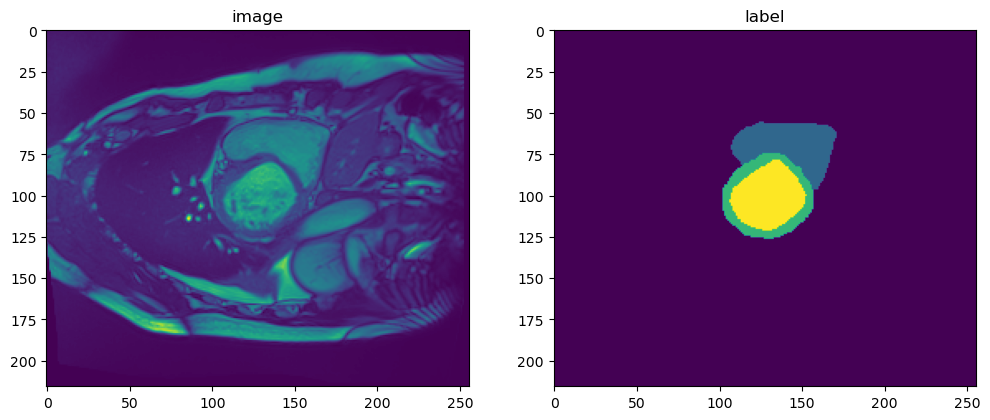

(216, 256) (216, 256)


In [10]:
plt.figure("check", (12, 6))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(seg)
plt.show()
print(image.shape, seg.shape)

In [18]:
# MONAI transforms always take channel-first data: [channel x H x W]
im_data = np.expand_dims(image,0)  # make them channel first
seg_data = np.expand_dims(seg, 0)  # make a channel for the segmentation

# create an Affine transform
affine = Affine(
    rotate_params=np.pi / 4,
    scale_params=(1.2, 1.2),
    translate_params=(200, 40),
    padding_mode="zeros",
    device=device,
)
# convert both image and segmentation using different interpolation mode
new_img, _ = affine(im_data, (256, 256), mode="bilinear")
new_seg, _ = affine(seg_data, (256, 256), mode="nearest")
print(new_img.shape, new_seg.shape)

(1, 256, 256) (1, 256, 256)


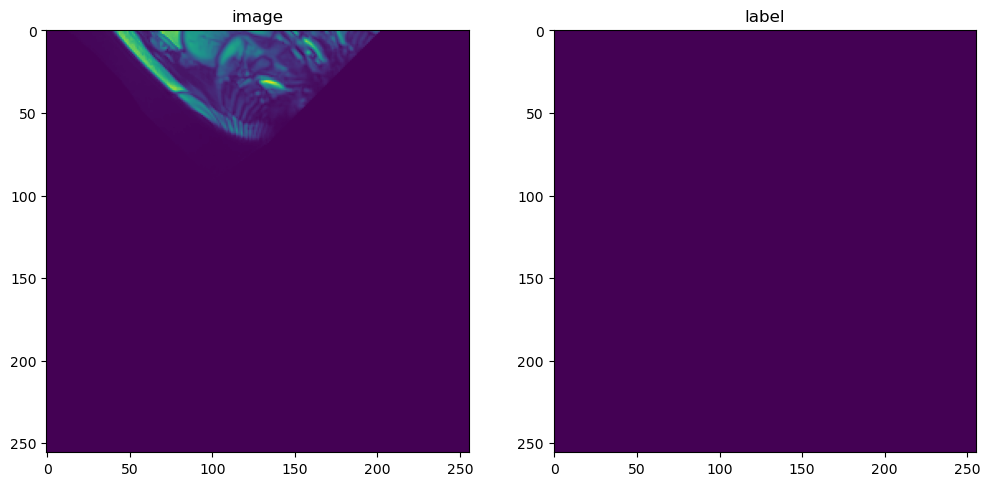

In [19]:
plt.figure("check", (12, 6))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(np.moveaxis(new_img.astype(int), 0, -1))
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(new_seg[0].astype(int))
plt.show()

In [ ]:
base_image = Image.open(r"D:\Kodingan\Kodingan TA\TA\unet\val_images_save_2d\1_image.png")
base_np = np.array(base_image)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(base_np, cmap='Blues')
axs[0].set_title('Base Image')
axs[0].axis('off')
plt.show